# cygnus-correlation

Correlate a Pythia-like version of Cygnus to verify that it matches Pythia exactly.

In [1]:
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

# Configuration

In [9]:
base_dir = '/u/cmolder/GitHub/ChampSim/out/pythia/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    ('spec17', 'weighted'),
    ('cloudsuite', 'weighted'),
    ('gap', 'one_phase'),
    ('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
]
features = [
    {'Delta_Path', 'PC_Delta'}, 
    {'PC'}, 
    {'PC_Delta'}, 
    {'Delta_Path'}, 
    {'Global'}
]
dpi = 150

In [10]:
dfs = {
    # ===
    # ===== Degree 1 =====
    # ===
    # Pythia
    'degree1/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/bwaware3.csv', features),

    'degree1/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/nozeroaction.csv', features),

    'degree1/pythia/vanilla': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/vanilla.csv', features),

    # Pythia correlation
    'degree1/bythio/vanilla_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/vanilla_pythialike.csv',
        features, feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_pythialike.csv', 
        features, feature_key='bythio_features'),

    'degree1/bythio/bwaware3_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/bwaware3_pythialike.csv',
        features, feature_key='bythio_features'),

    # ===
    # ===== Dynamic degree =====
    # ===
    # Pythia
    'degreedyn/pythia/bwaware3': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/bwaware3.csv', features),

    'degreedyn/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/nozeroaction.csv', features),

    'degreedyn/pythia/vanilla': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/vanilla.csv', features),

    # Pythia correlation
    'degreedyn/bythio/vanilla_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/vanilla_pythialike.csv',
        features, feature_key='bythio_features'),

    'degreedyn/bythio/nozeroaction_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction_pythialike.csv', 
        features, feature_key='bythio_features'),

    'degreedyn/bythio/bwaware3_pythialike': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/bwaware3_pythialike.csv',
        features, feature_key='bythio_features'),
}

In [11]:
def get_colors(prefetcher_dict):
    return {k : 'C0' if 'pythia' in k.lower() else 'C1' for k in prefetcher_dict}

# Plots

## 1-core, degree 1

In [5]:
degree1_1core_df = {
    #'Pythia NZA (PC_Delta, Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    #'Cygnus NZA (PC_Delta, Delta_Path)': dfs['degree1/bythio/nozeroaction_pythialike']['Delta_Path, PC_Delta'],
    #'Pythia NZA (PC)': dfs['degree1/pythia/nozeroaction']['PC'],
    #'Cygnus NZA (PC)': dfs['degree1/bythio/nozeroaction_pythialike']['PC'],
    #'Pythia NZA (Stateless)': dfs['degree1/pythia/nozeroaction']['Global'],
    #'Cygnus NZA (Stateless)': dfs['degree1/bythio/nozeroaction_pythialike']['Global'],
    #'Pythia Vanilla (PC_Delta, Delta_Path)': dfs['degree1/pythia/vanilla']['Delta_Path, PC_Delta'],
    #'Cygnus Vanilla (PC_Delta, Delta_Path)': dfs['degree1/bythio/vanilla_pythialike']['Delta_Path, PC_Delta'],
    'Pythia BWAware3 (PC)': dfs['degree1/pythia/bwaware3']['PC'],
    'Cygnus BWAware3 (PC)': dfs['degree1/bythio/bwaware3_pythialike']['PC'],
    'Pythia BWAware3 (PC_Delta, Delta_Path)': dfs['degree1/pythia/bwaware3']['Delta_Path, PC_Delta'],
    'Cygnus BWAware3 (PC_Delta, Delta_Path)': dfs['degree1/bythio/bwaware3_pythialike']['Delta_Path, PC_Delta'],
}

degree1_1core_legend_kwargs = {
    'ncol': 3,
    'fontsize': 8,
    'loc': 'lower left',
    'bbox_to_anchor': (0.0, 1.0),
}

degree1_1core_suptitle = 'Pythia correlation (512 KB, degree-1, 1 core)'

=== spec06 weighted ===


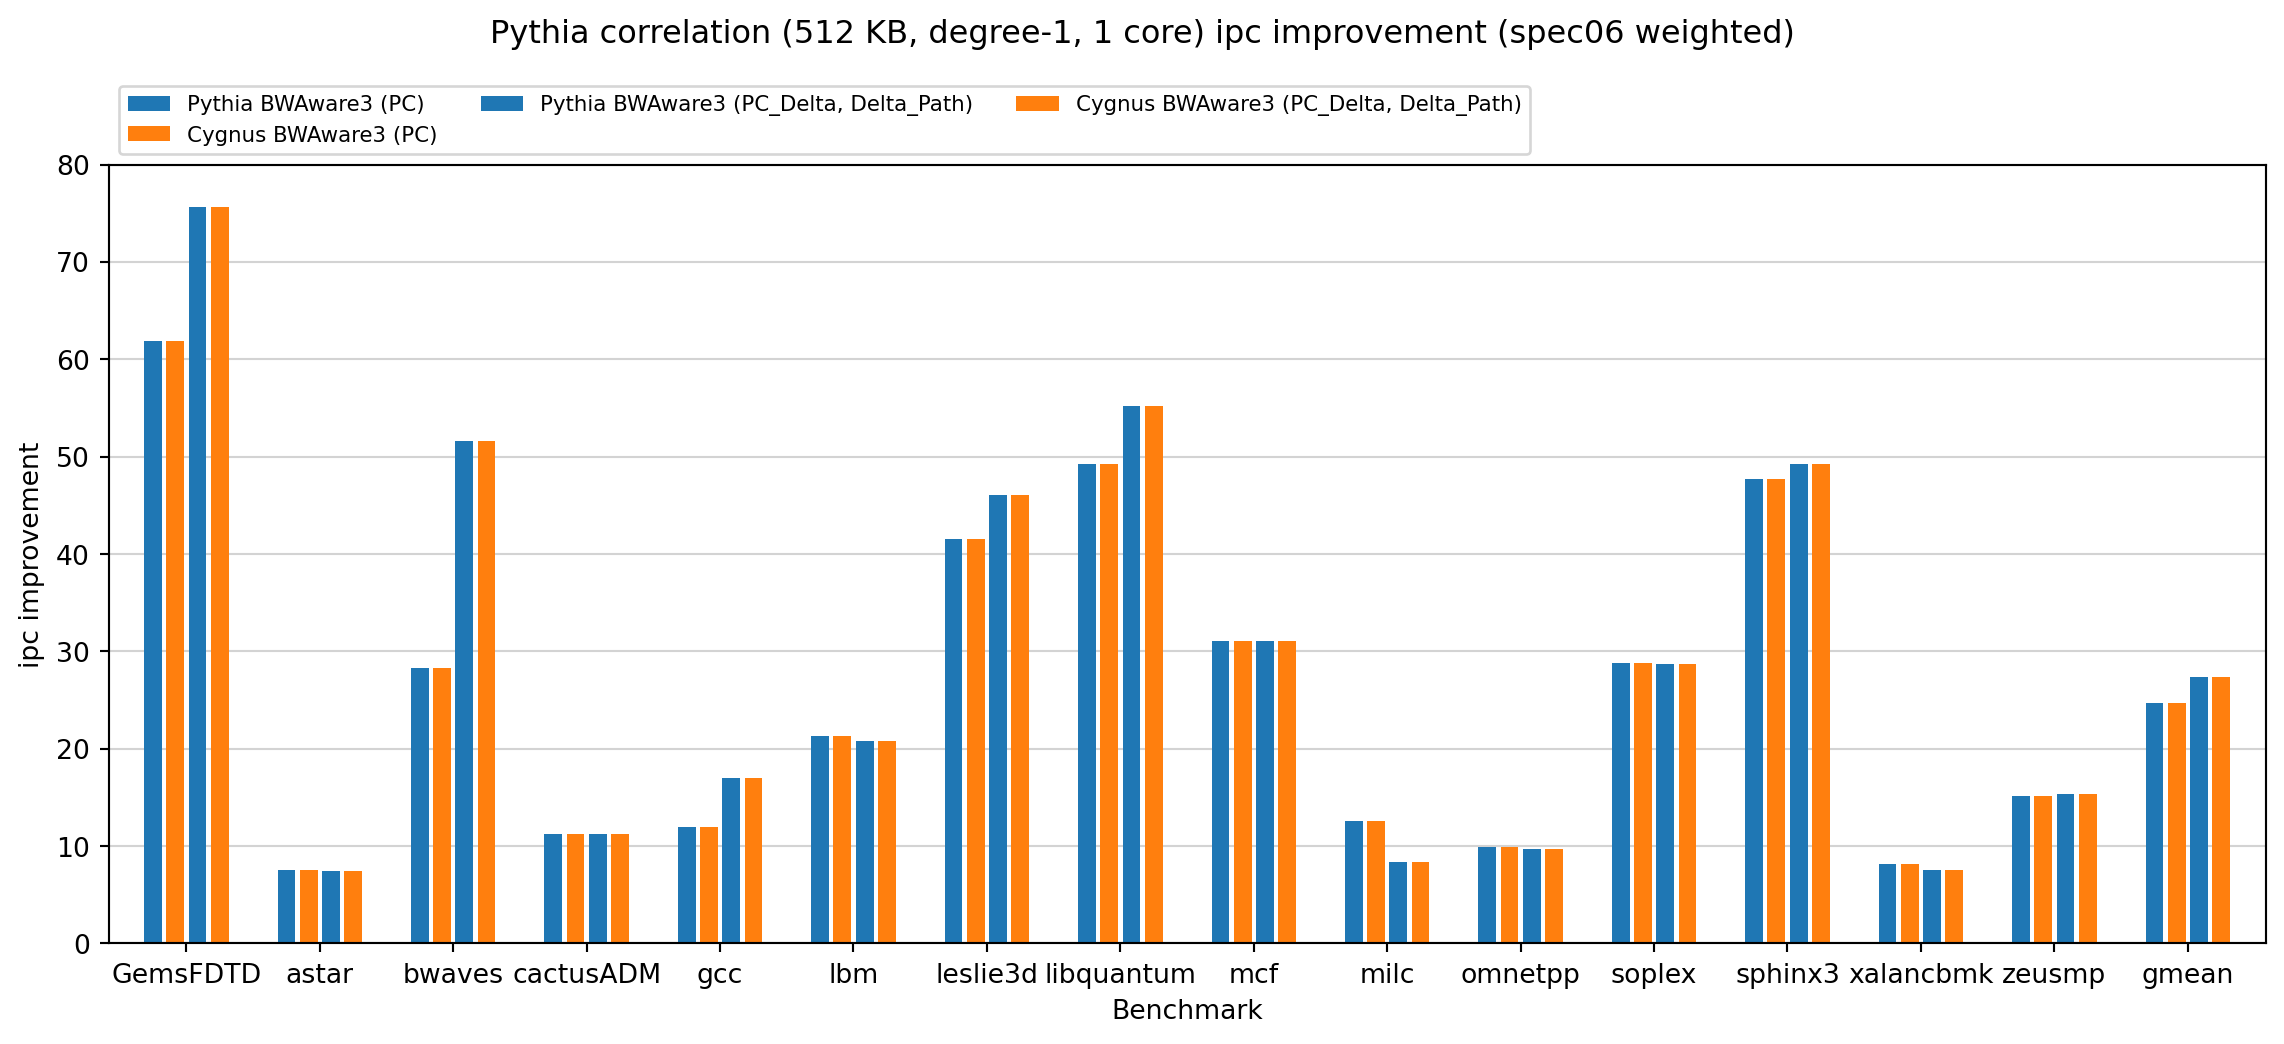

=== spec17 weighted ===


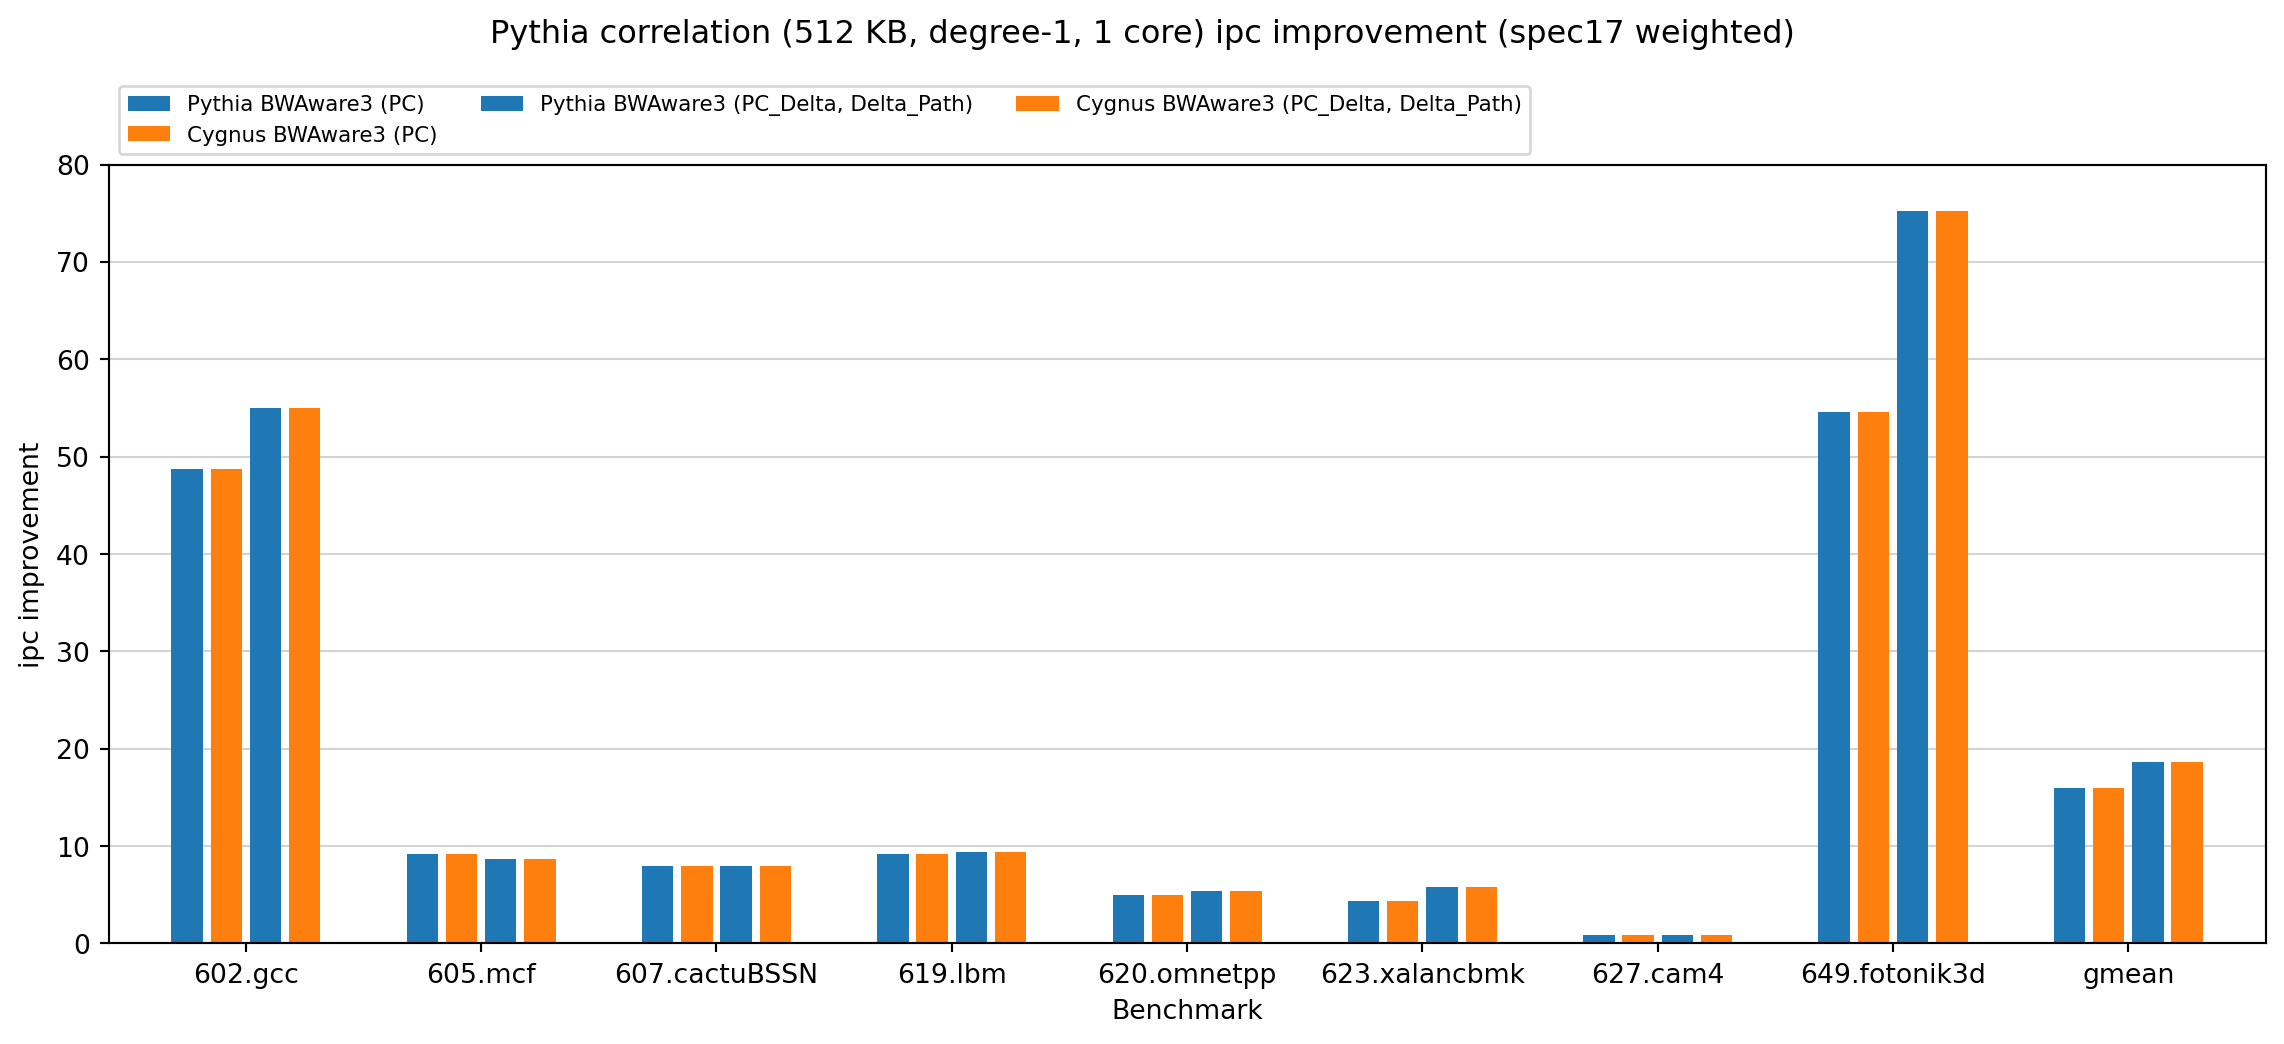

=== cloudsuite weighted ===


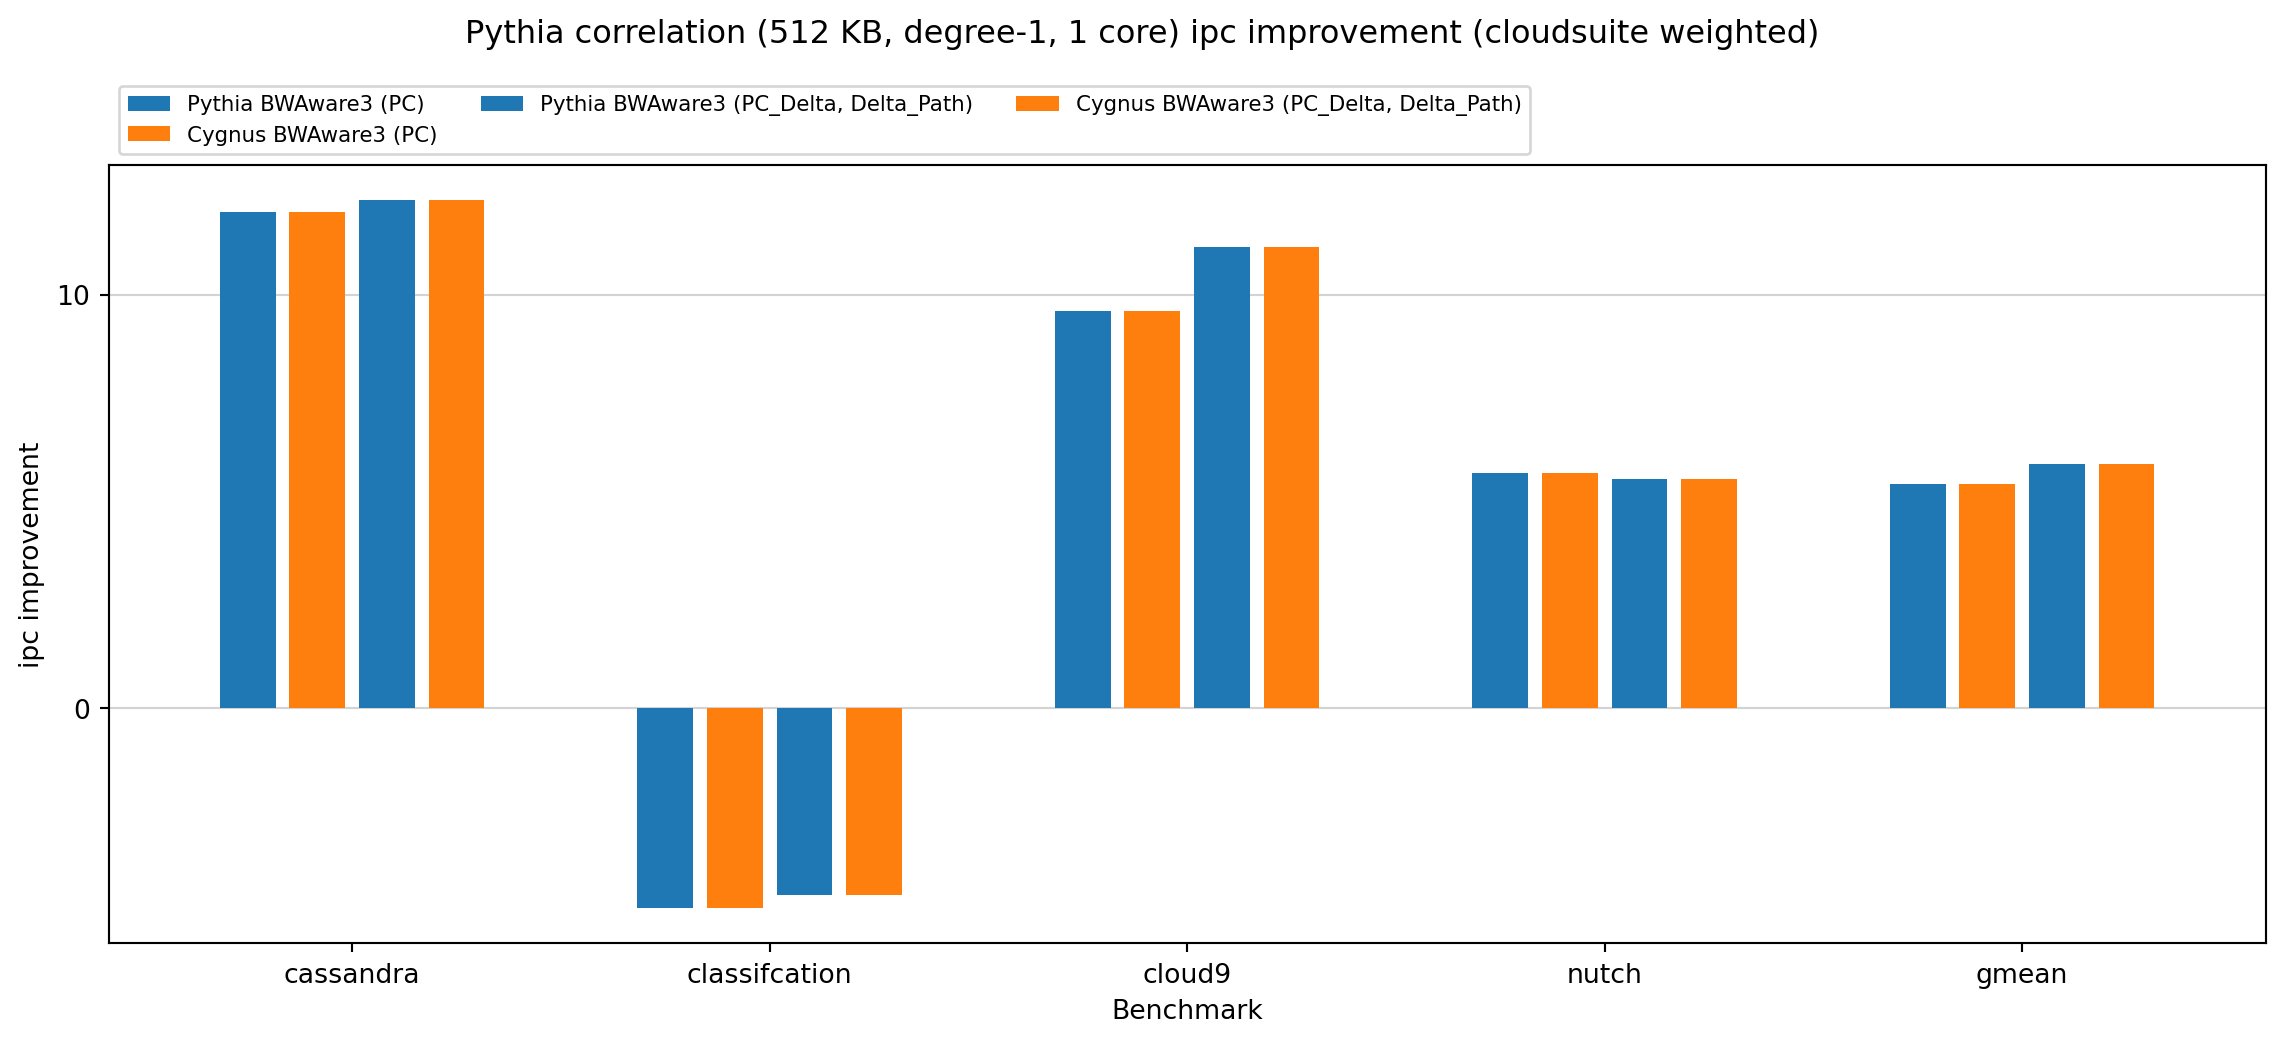

=== gap one_phase ===


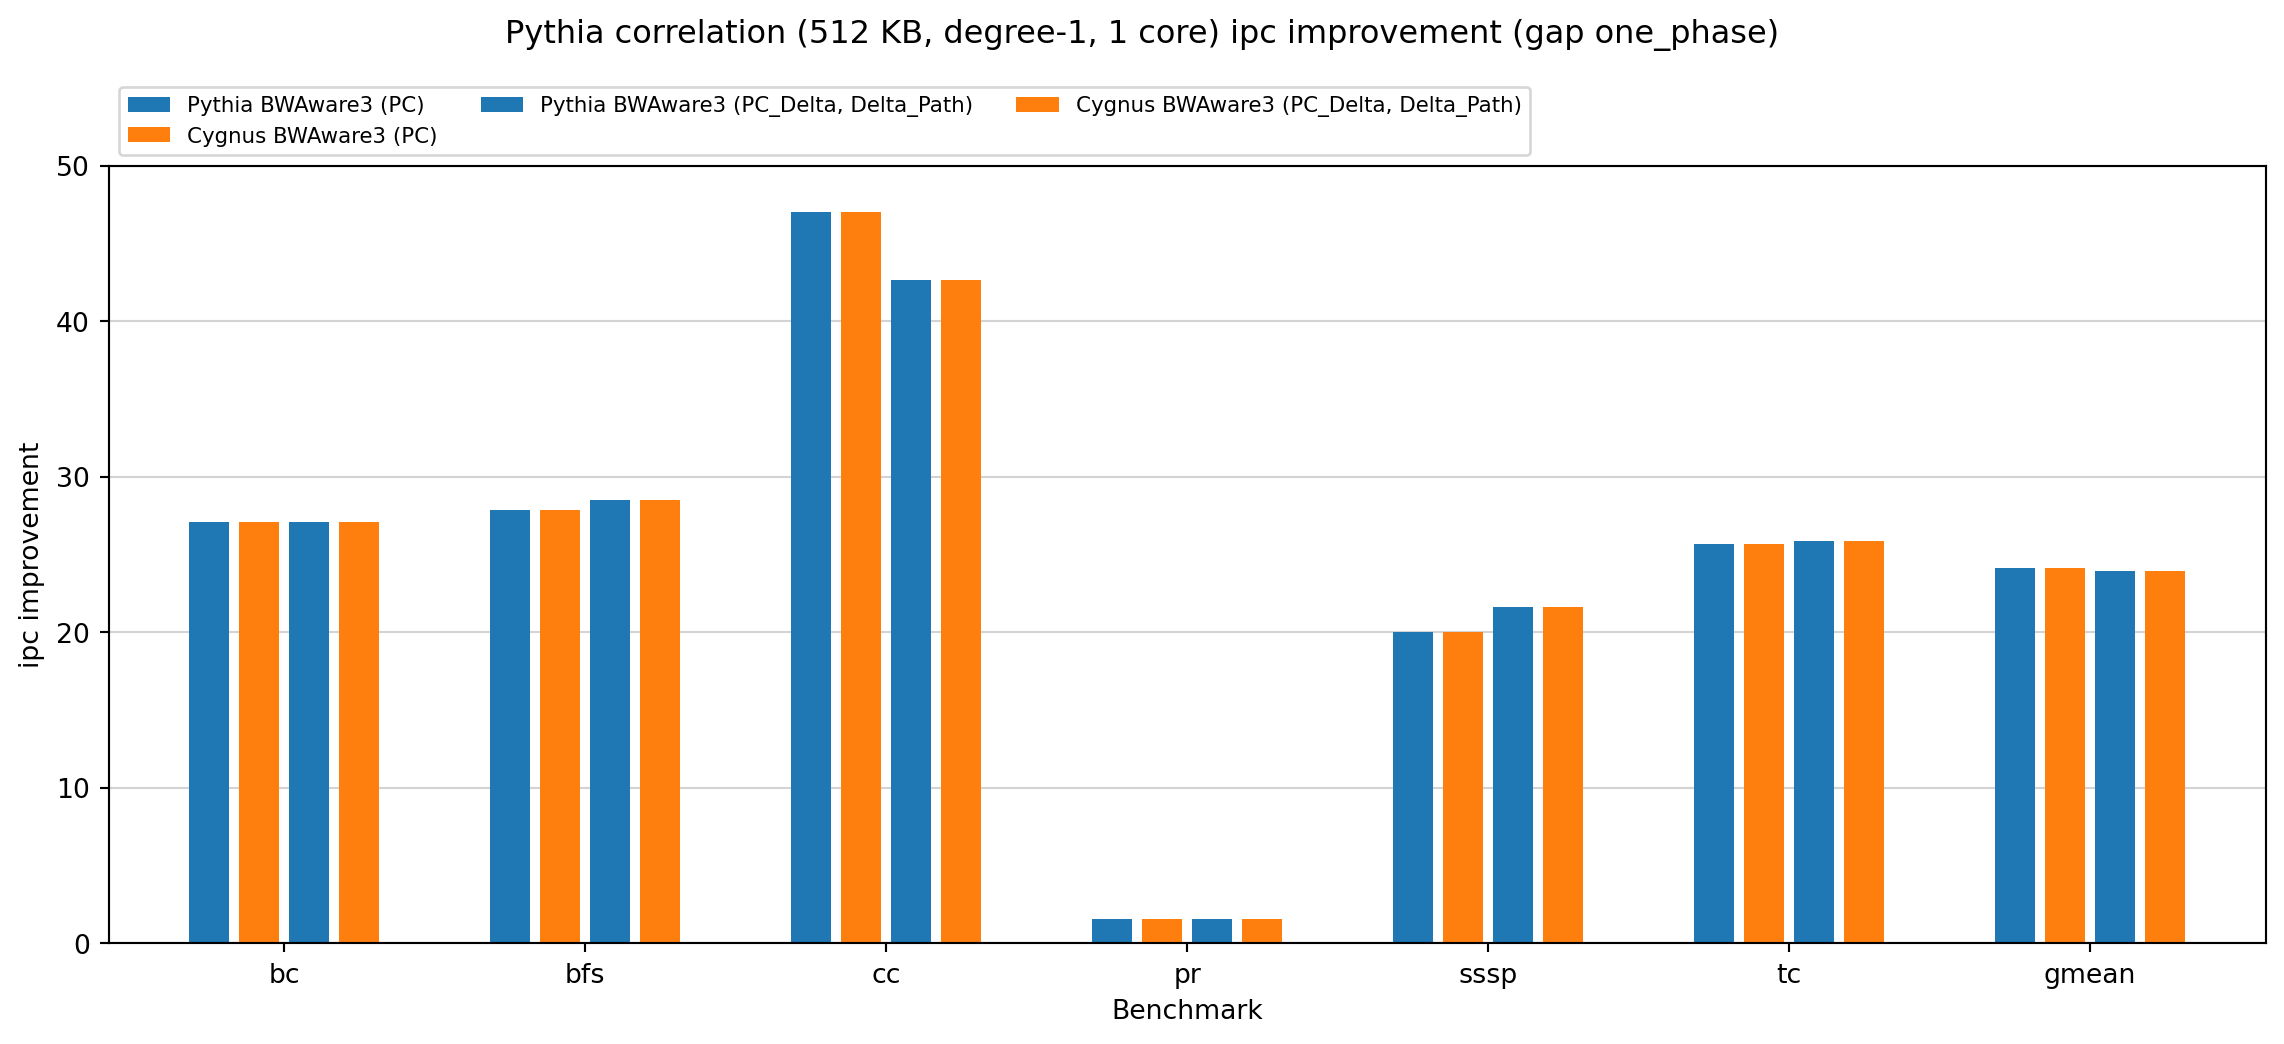

=== google one_phase ===


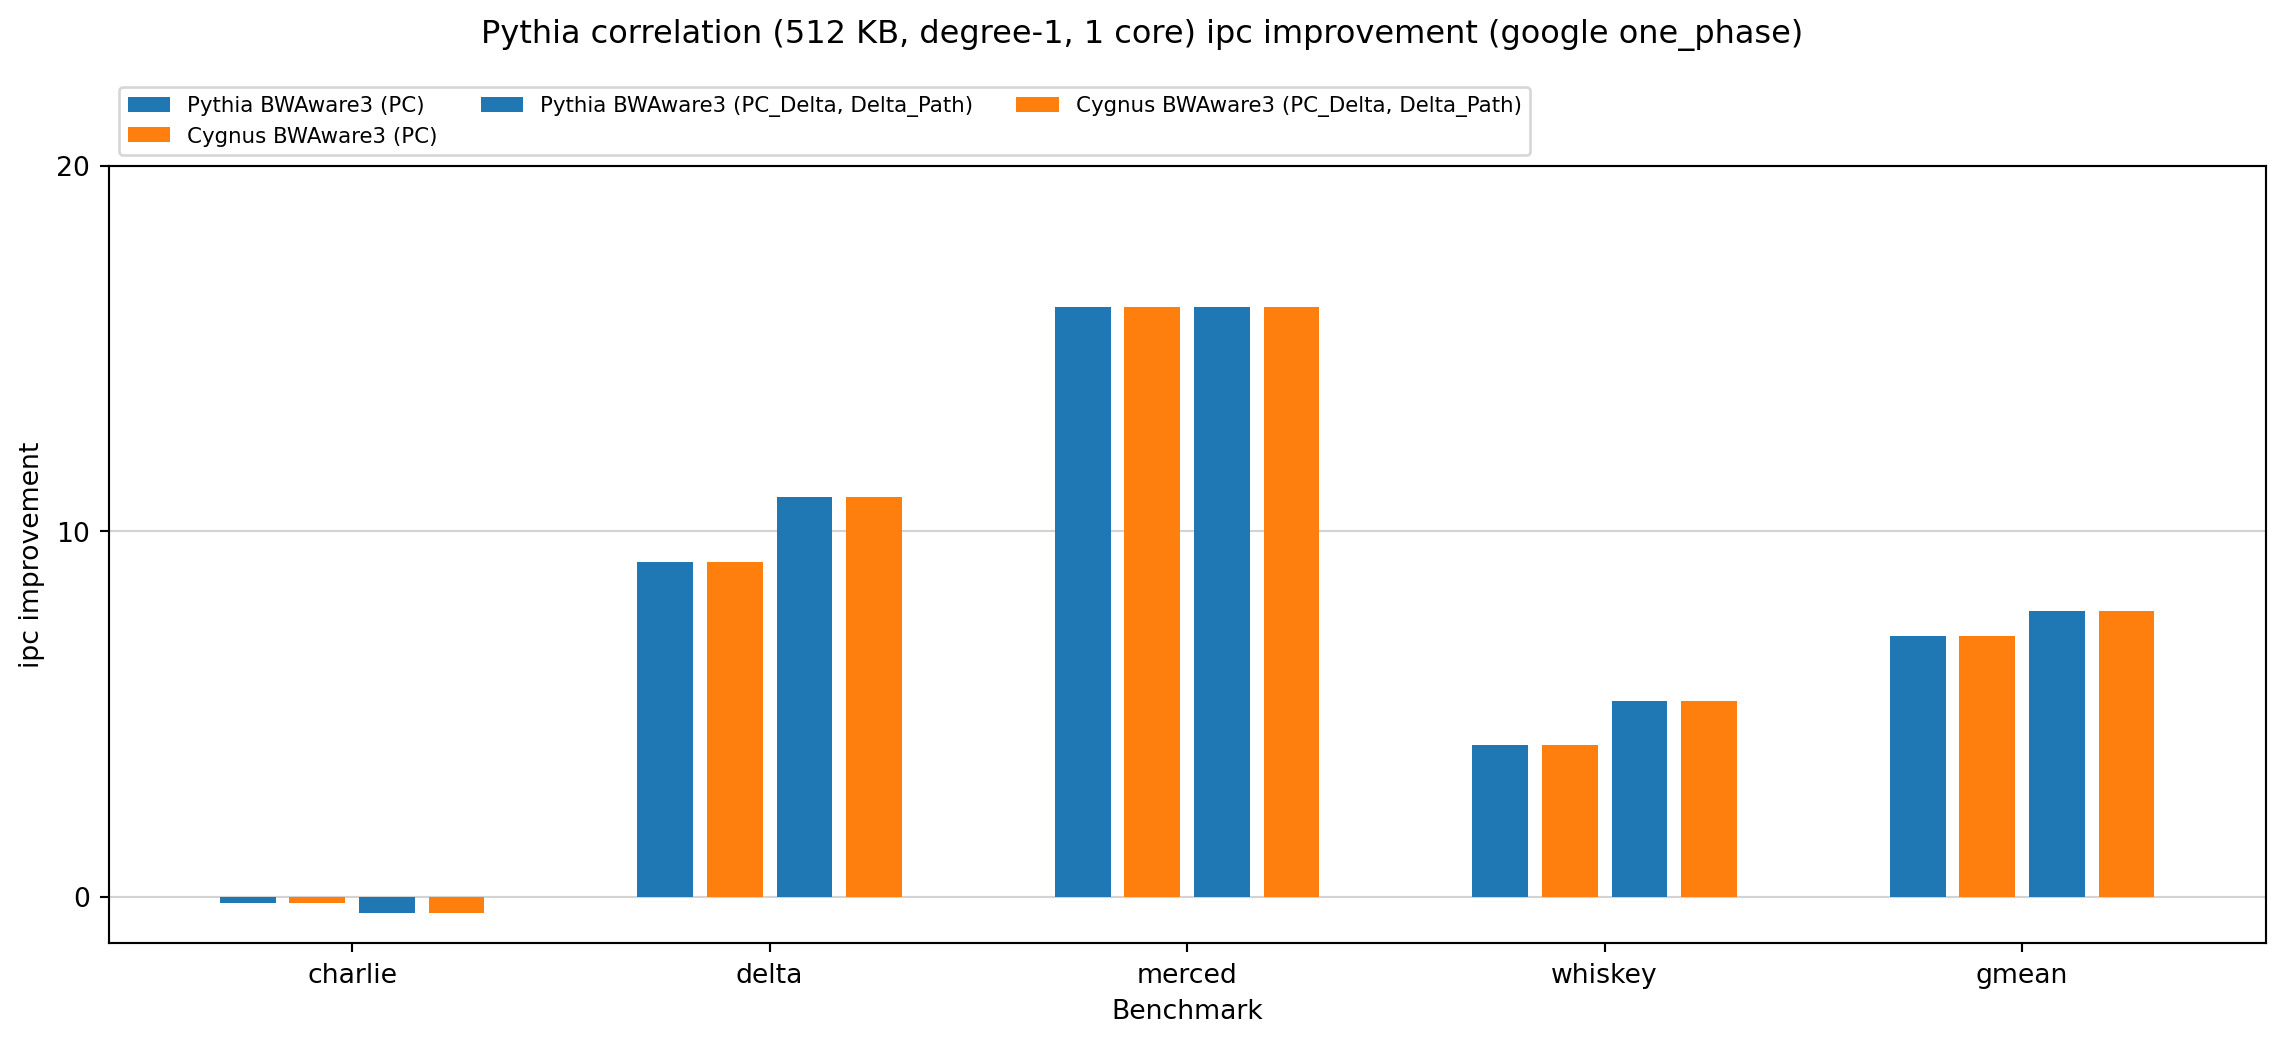

In [6]:
plots.plot_everything(degree1_1core_df, suites=suites, metrics=metrics, 
                      colors=get_colors(degree1_1core_df), 
                      legend_kwargs=degree1_1core_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5), suptitle=degree1_1core_suptitle)

## 1-core, dynamic degree

In [12]:
degreedyn_1core_df = {
    #'Pythia NZA (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    #'Cygnus NZA (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/nozeroaction_pythialike']['Delta_Path, PC_Delta'],
    #'Pythia NZA (PC)': dfs['degreedyn/pythia/nozeroaction']['PC'],
    #'Cygnus NZA (PC)': dfs['degreedyn/bythio/nozeroaction_pythialike']['PC'],
    #'Pythia NZA (Stateless)': dfs['degreedyn/pythia/nozeroaction']['Global'],
    #'Cygnus NZA (Stateless)': dfs['degreedyn/bythio/nozeroaction_pythialike']['Global'],
    #'Pythia Vanilla (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/vanilla']['Delta_Path, PC_Delta'],
    #'Cygnus Vanilla (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/vanilla_pythialike']['Delta_Path, PC_Delta'],
    'Pythia BWAware3 (PC)': dfs['degreedyn/pythia/bwaware3']['PC'],
    'Cygnus BWAware3 (PC)': dfs['degreedyn/bythio/bwaware3_pythialike']['PC'],
    'Pythia BWAware3 (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/bwaware3']['Delta_Path, PC_Delta'],
    'Cygnus BWAware3 (PC_Delta, Delta_Path)': dfs['degreedyn/bythio/bwaware3_pythialike']['Delta_Path, PC_Delta'],
}

degreedyn_1core_legend_kwargs = {
    'ncol': 3,
    'fontsize': 8,
    'loc': 'lower left',
    'bbox_to_anchor': (0.0, 1.0),
}

degreedyn_1core_suptitle = 'Pythia correlation (512 KB, dynamic degree, 1 core)'

=== spec06 weighted ===


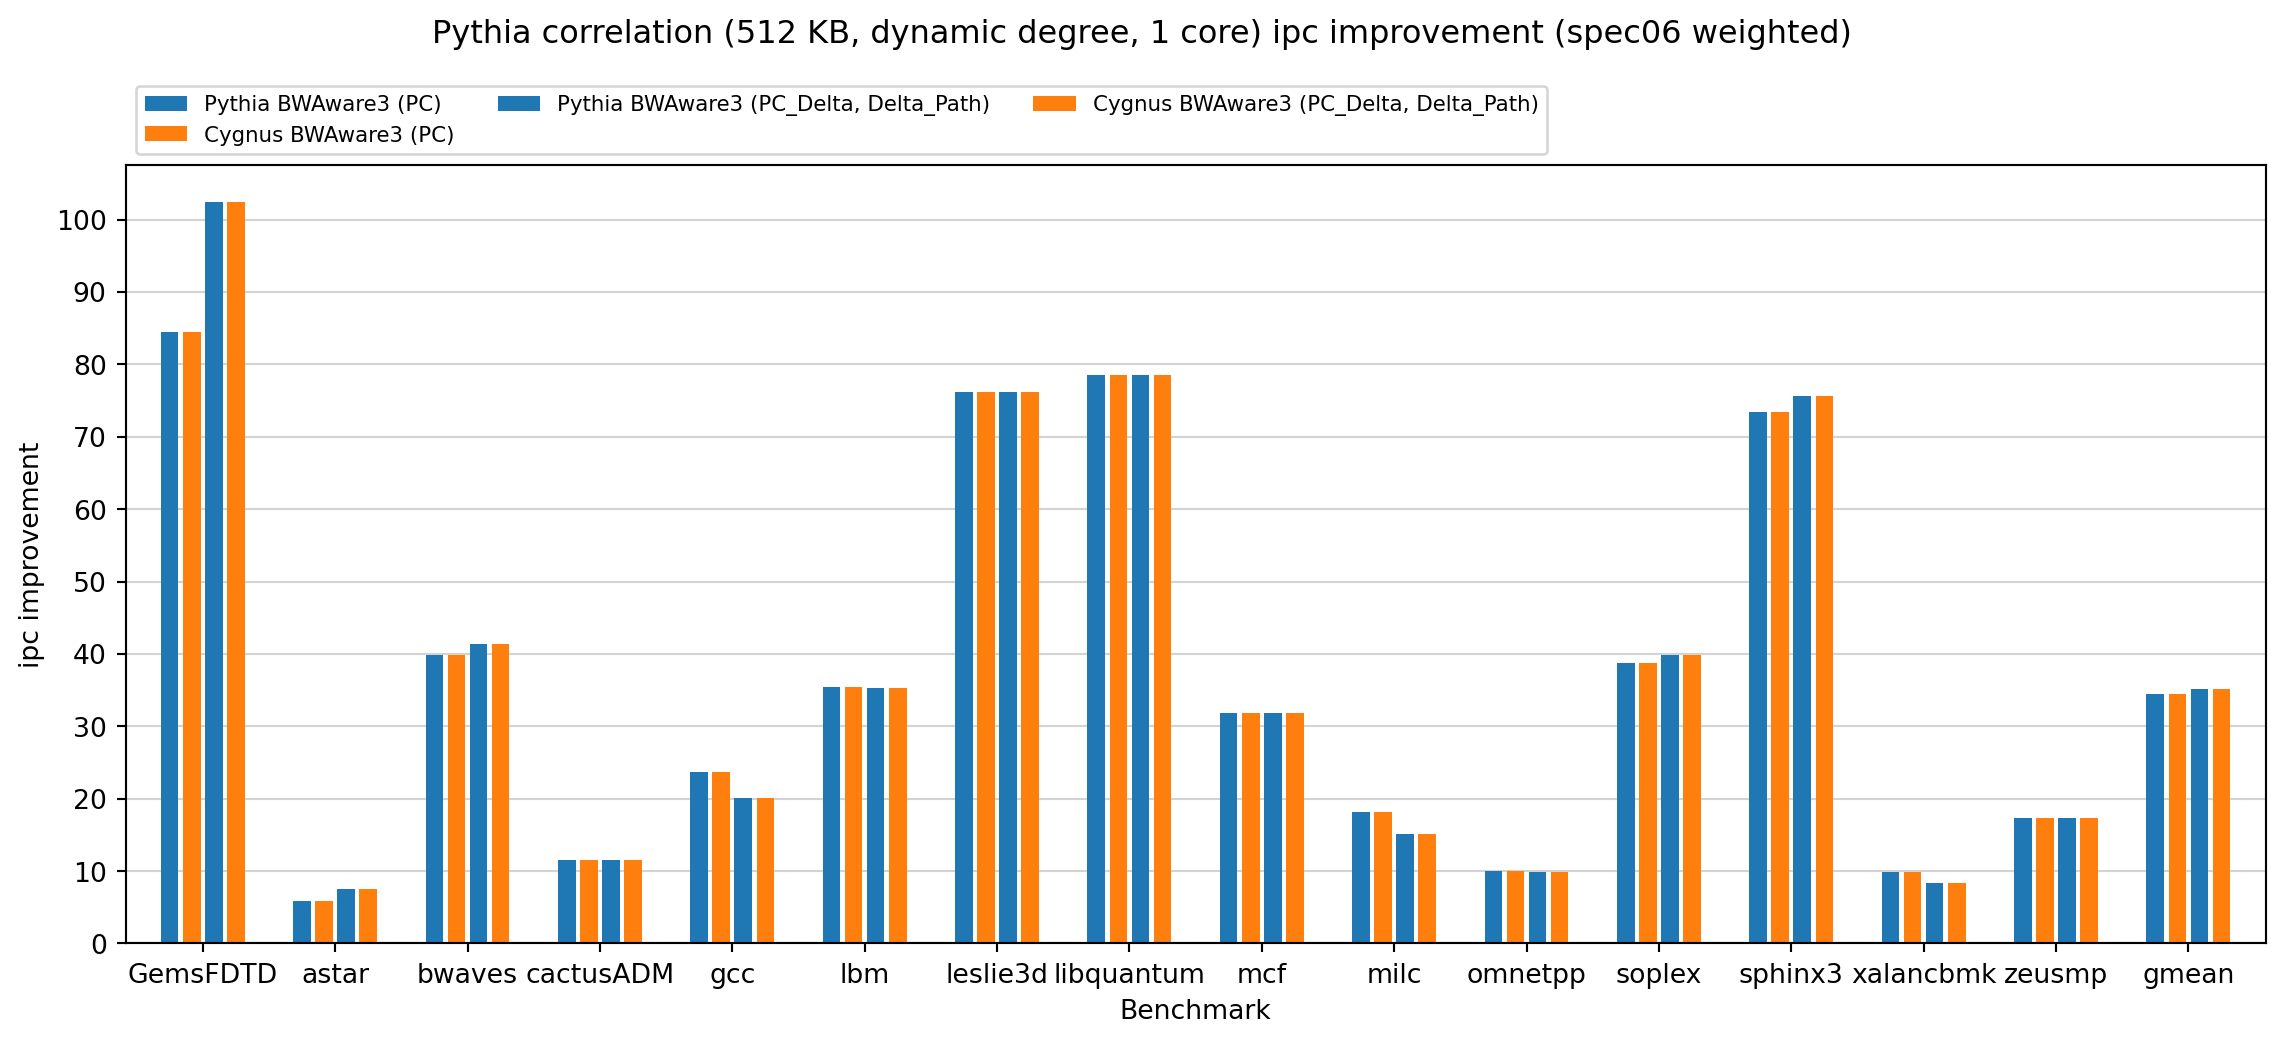

=== spec17 weighted ===


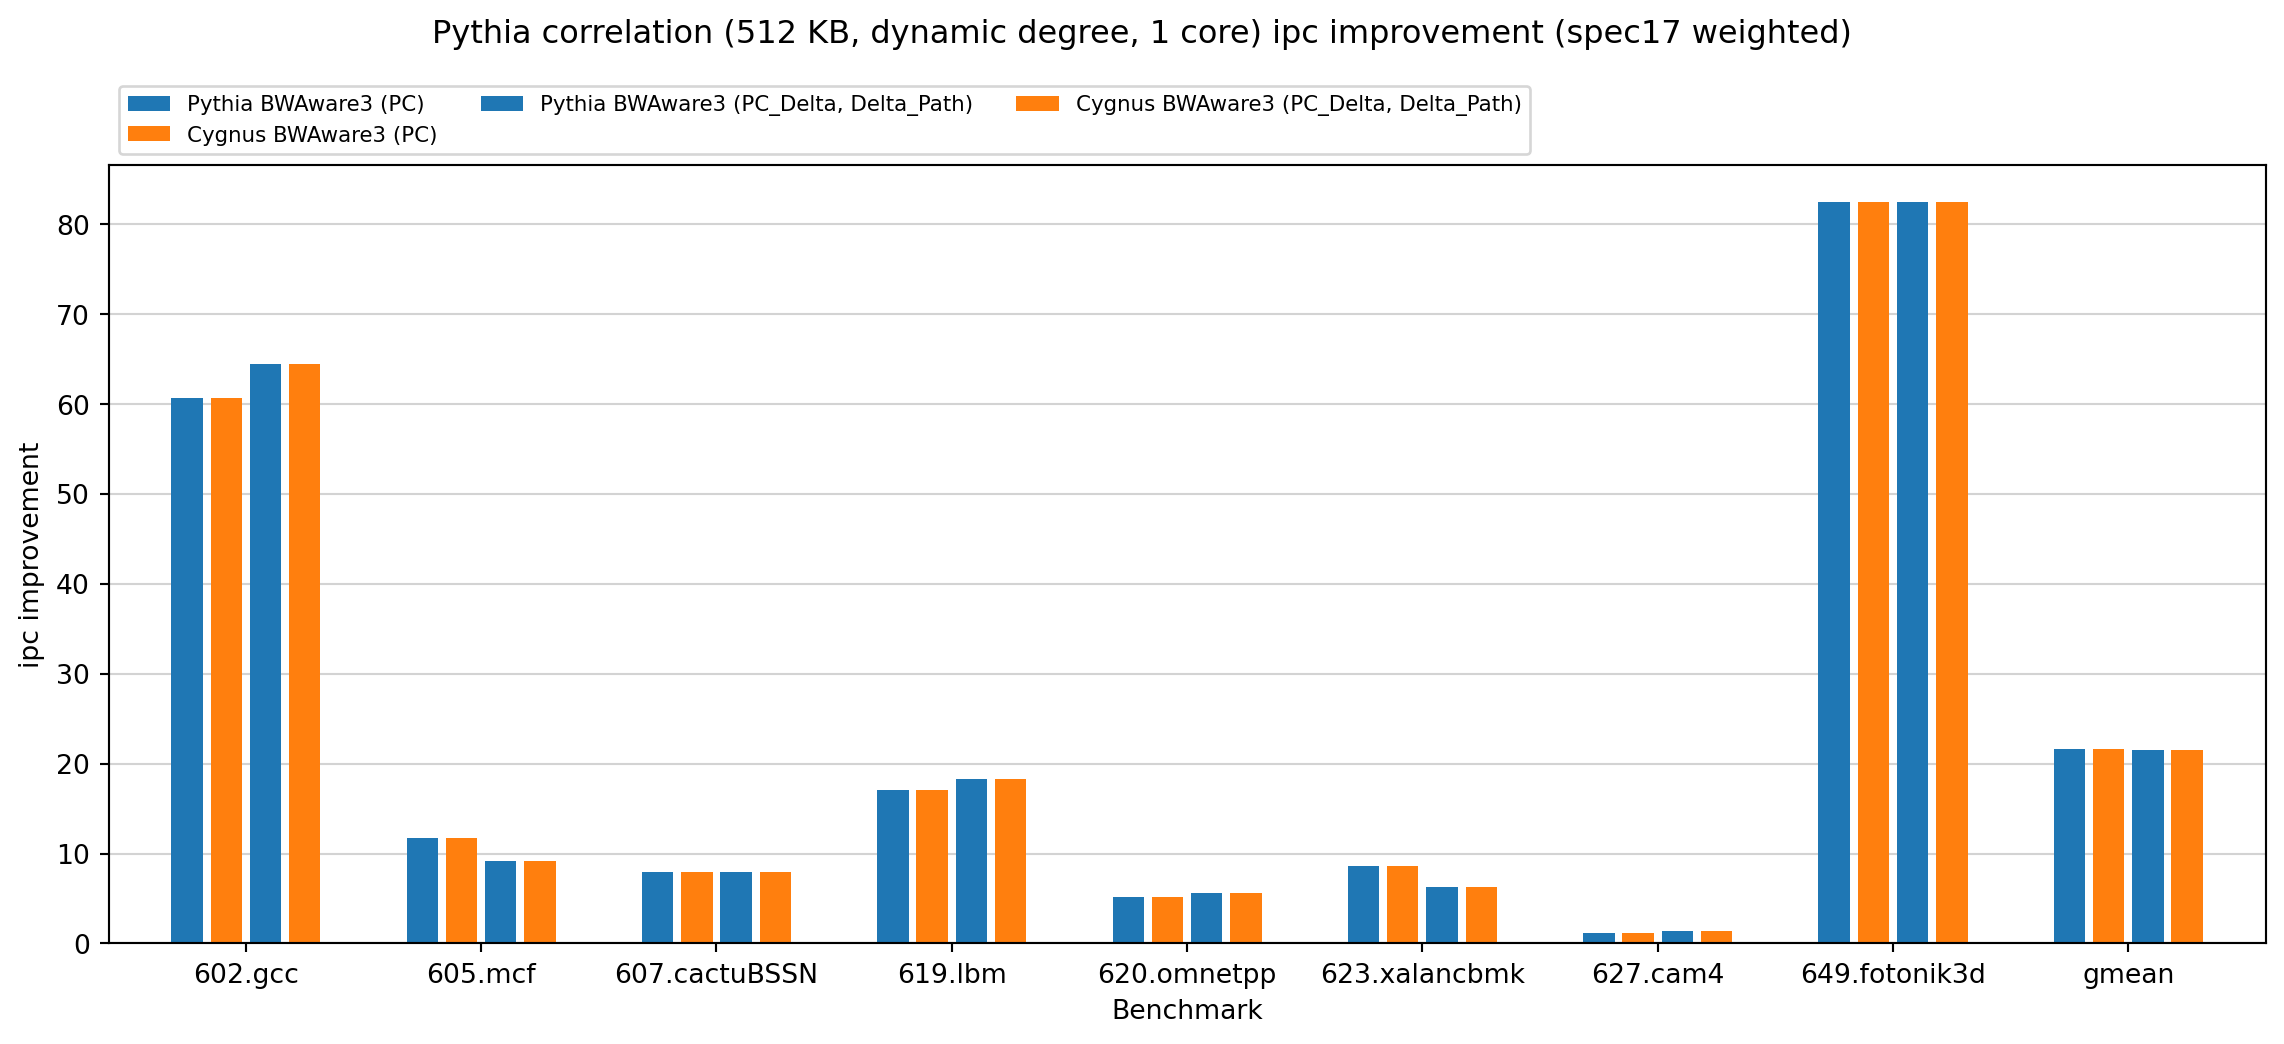

=== cloudsuite weighted ===


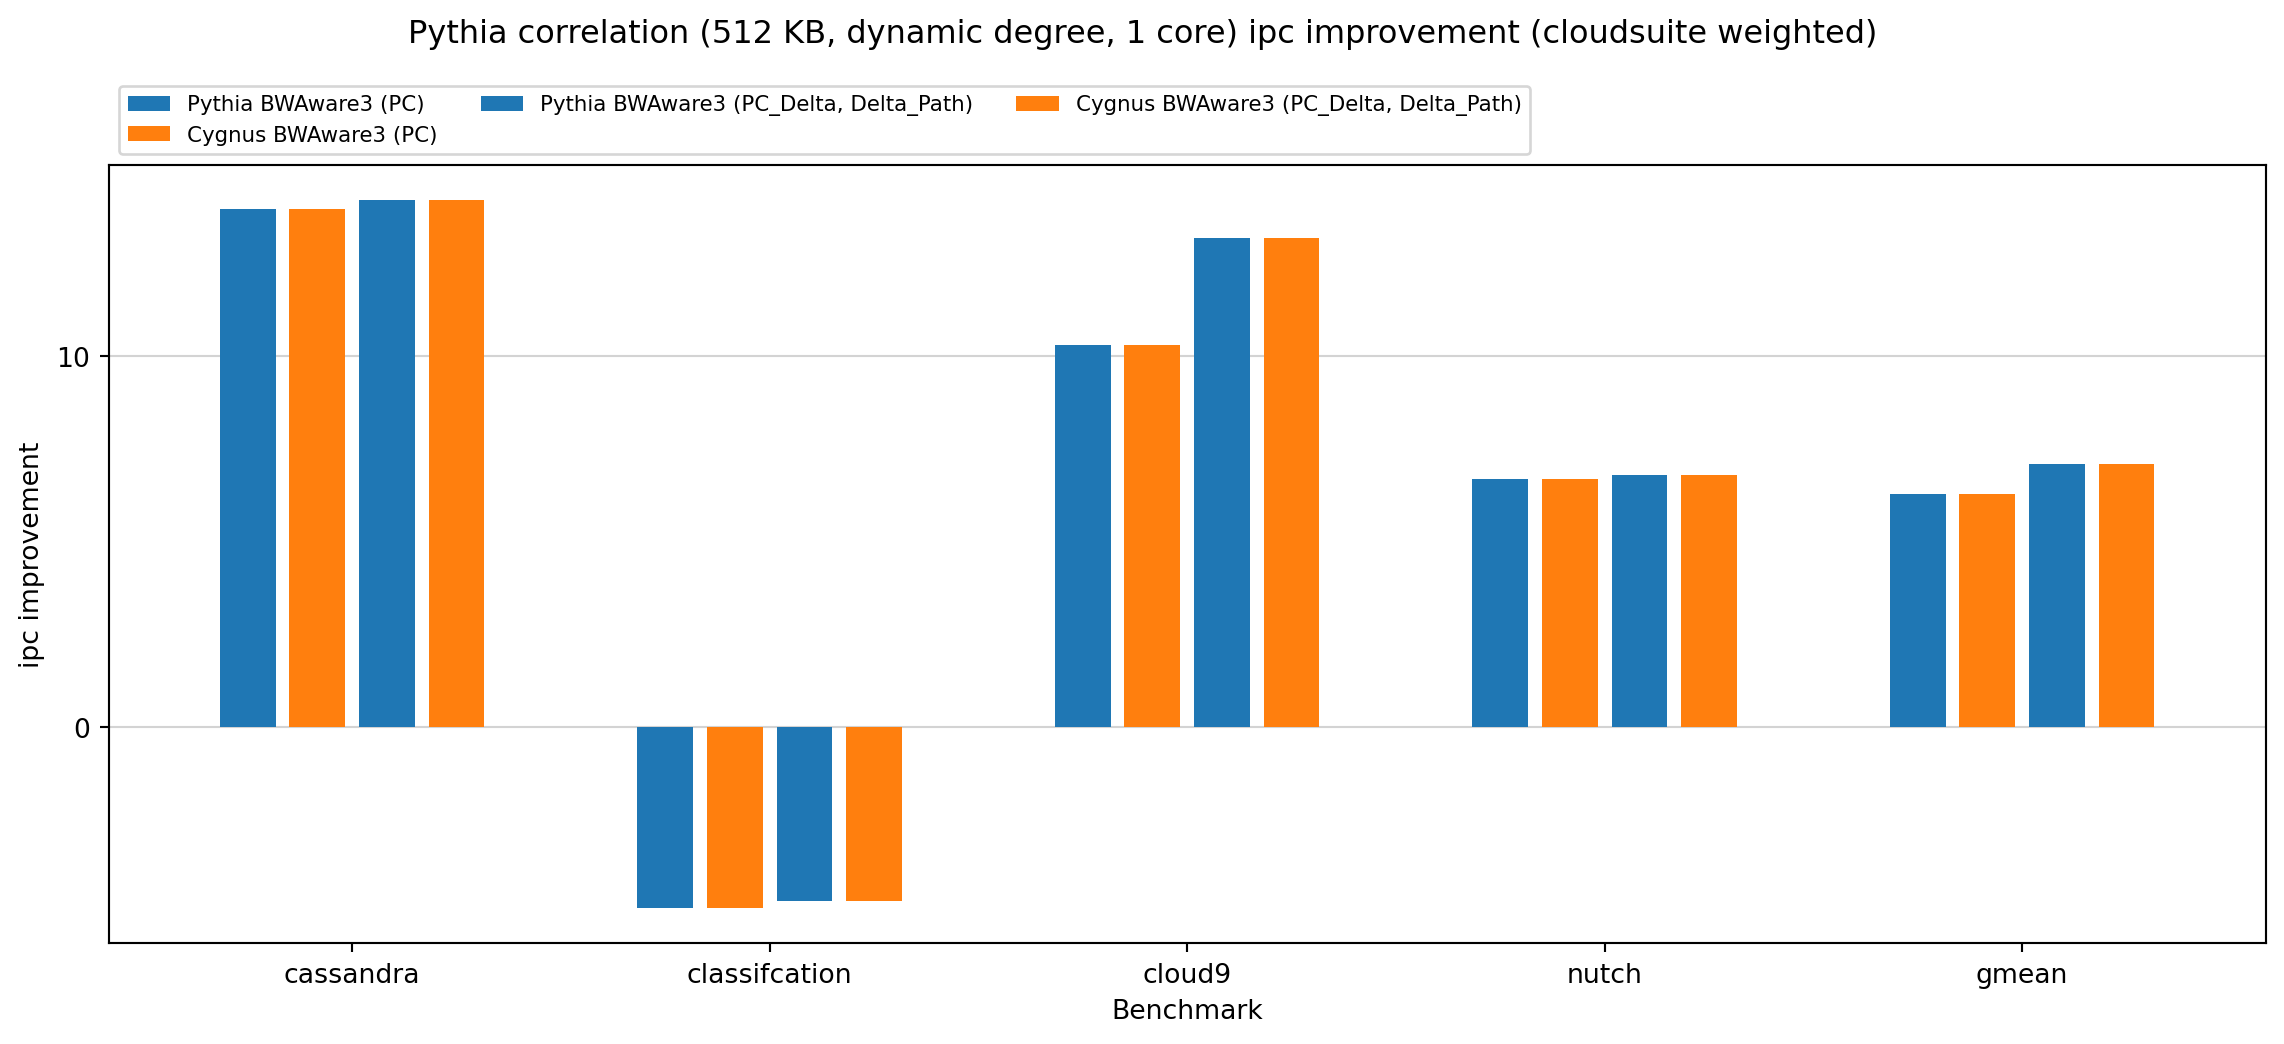

=== gap one_phase ===


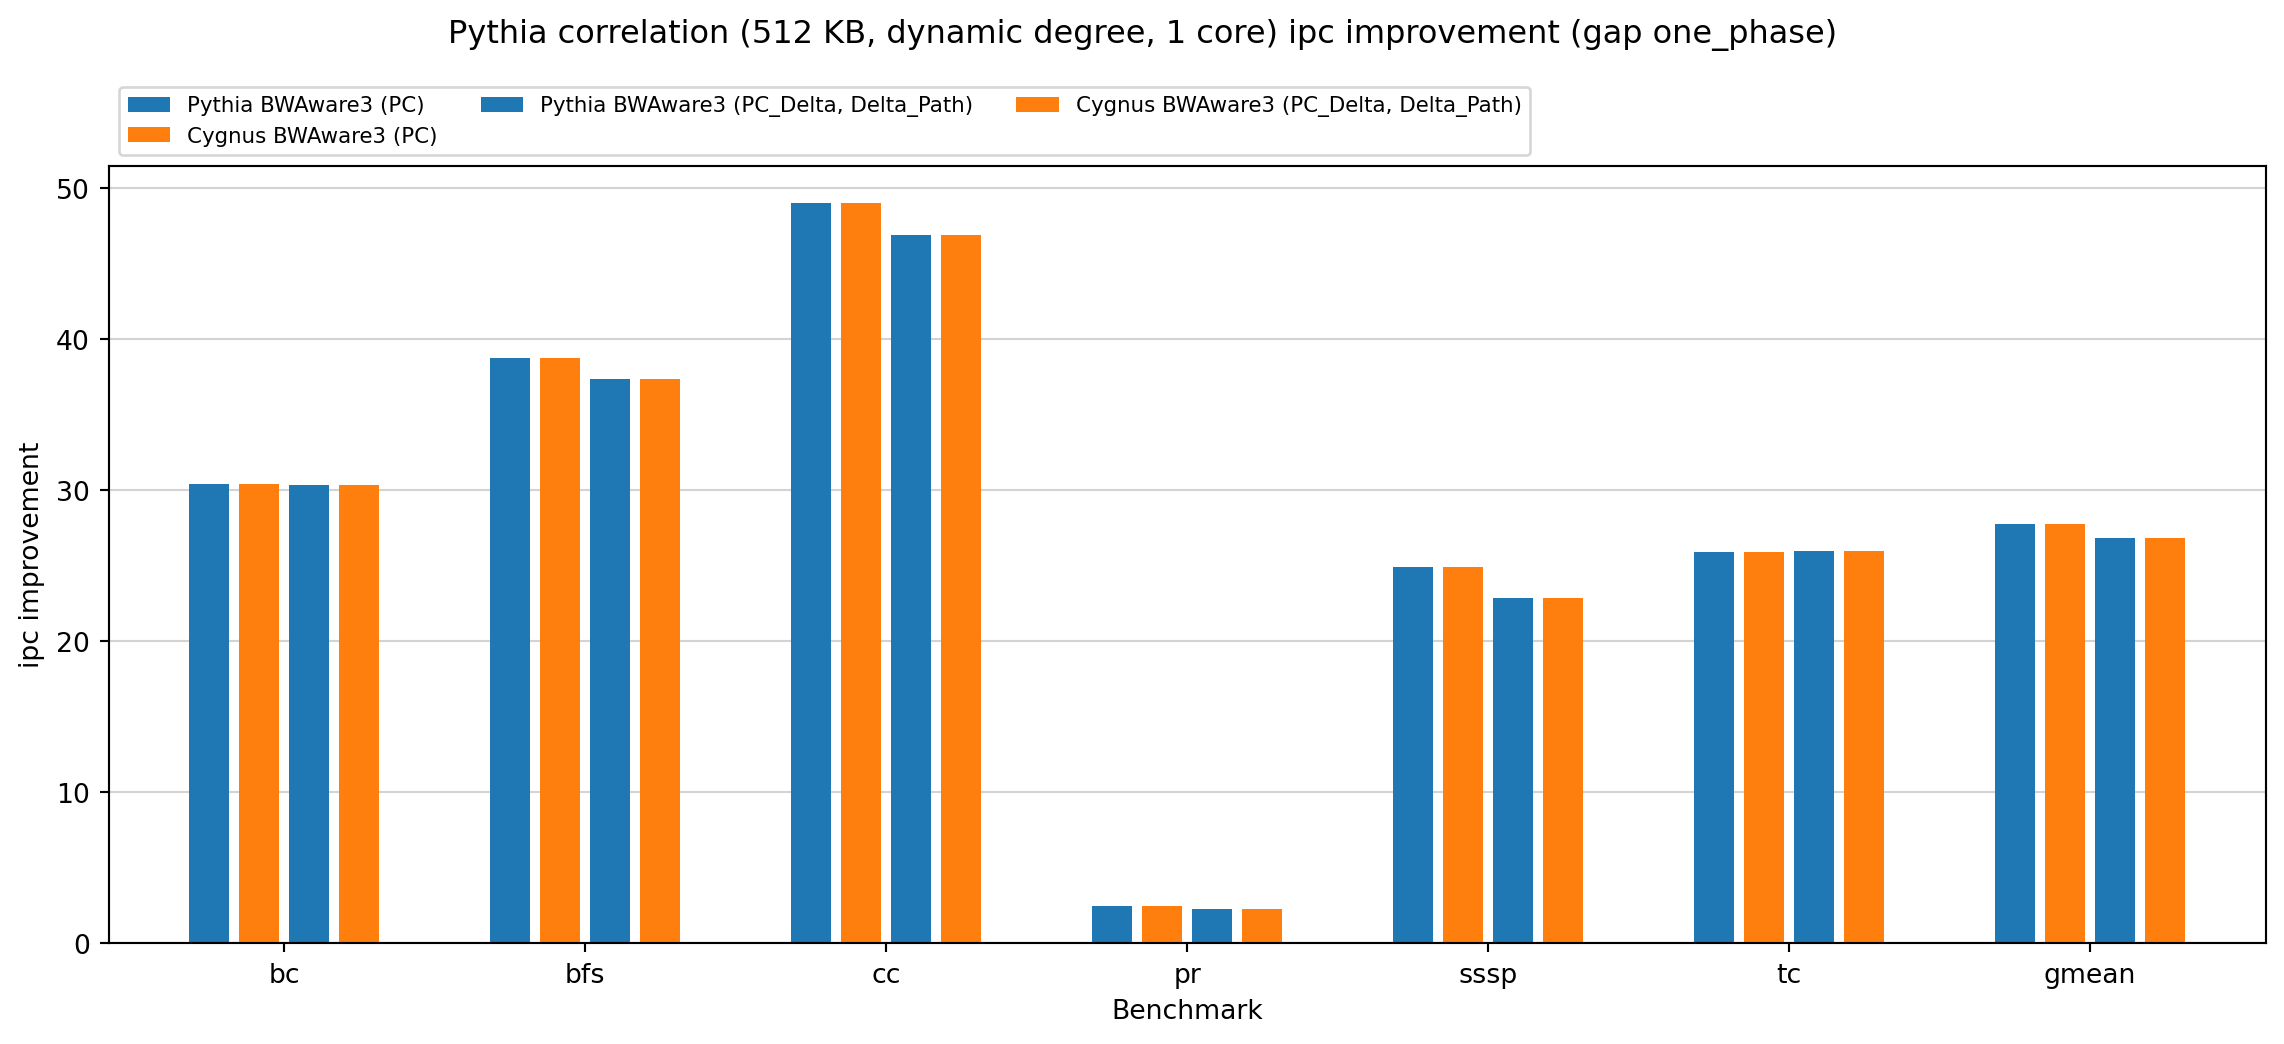

=== google one_phase ===


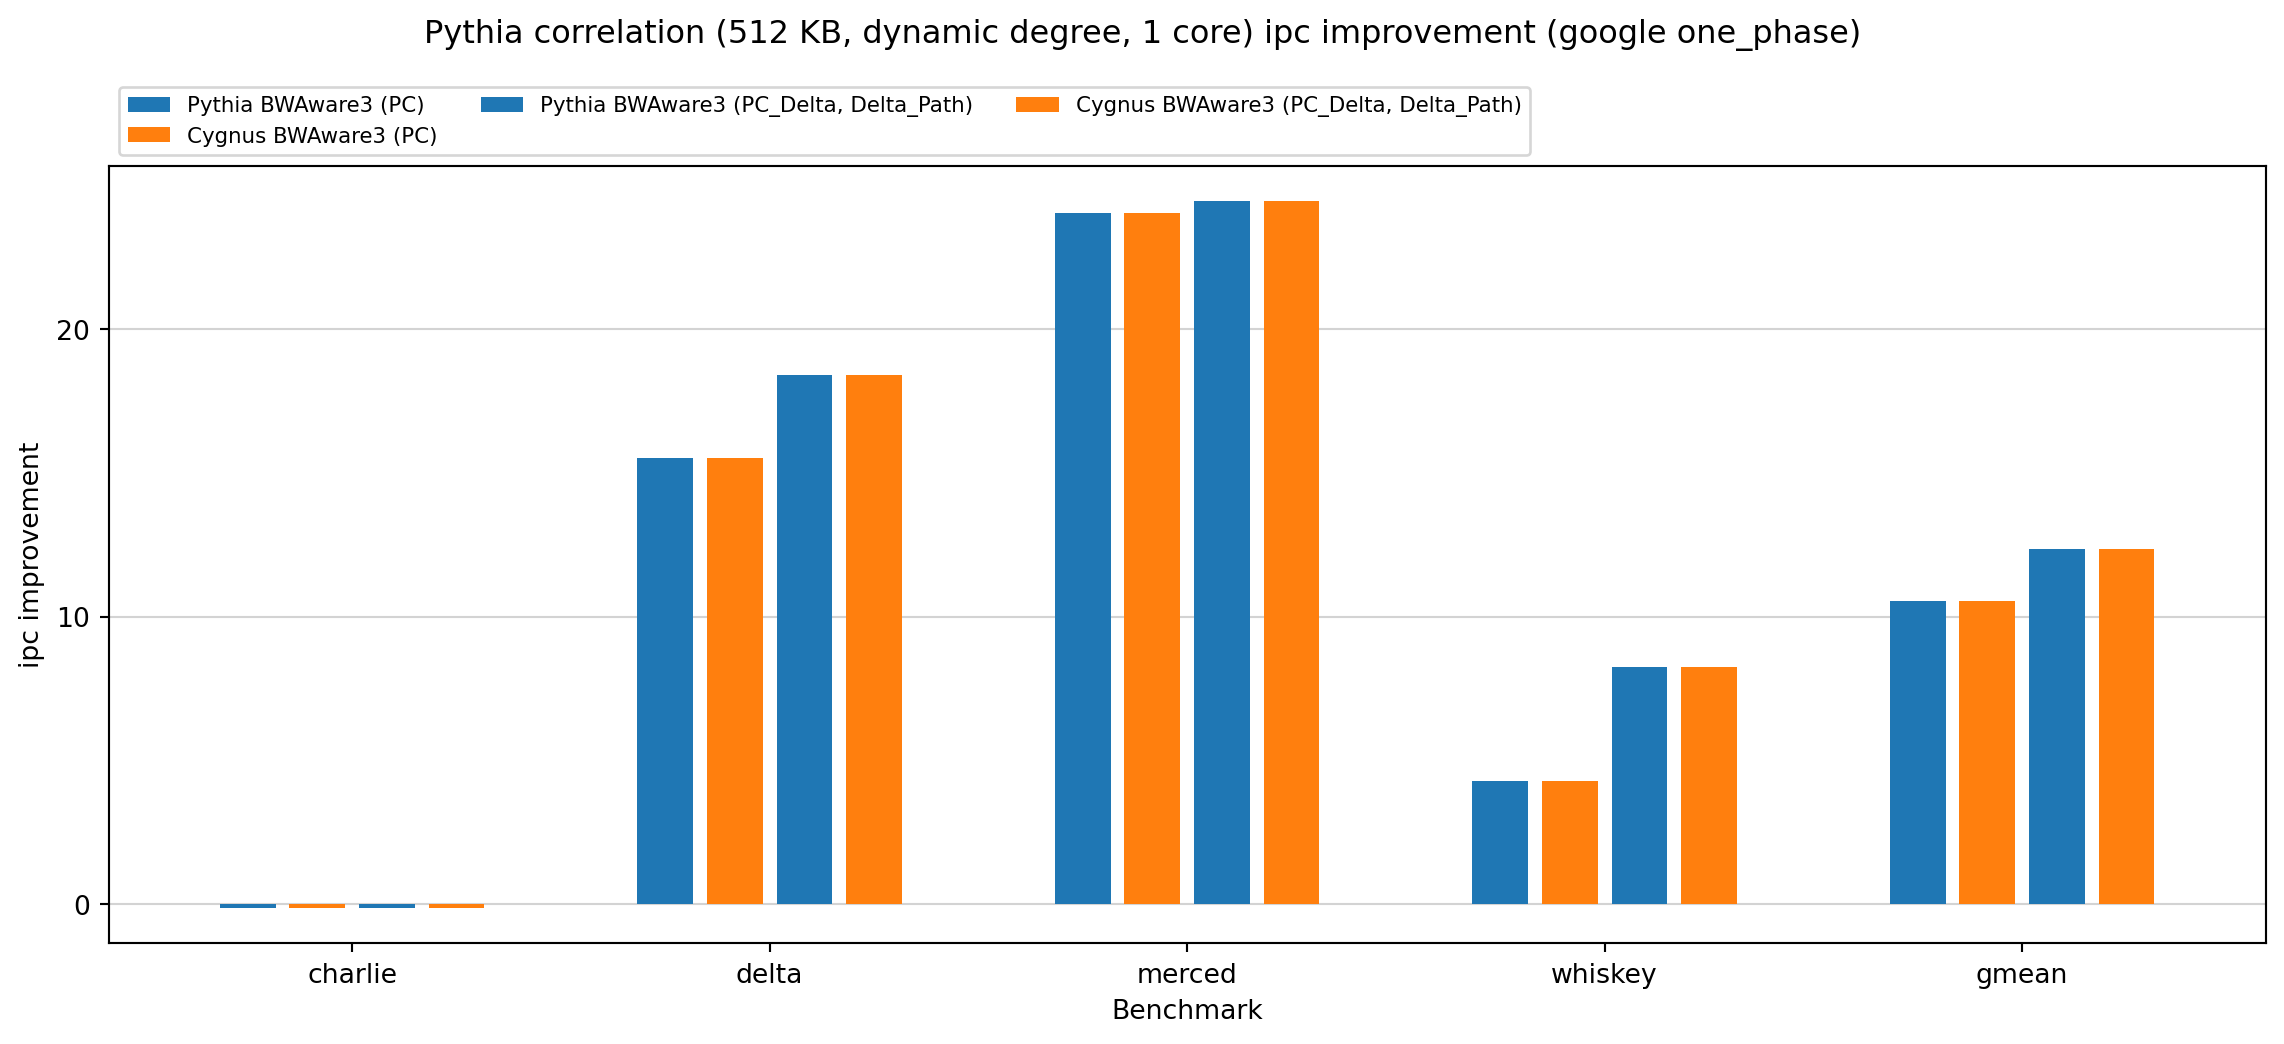

In [13]:
plots.plot_everything(degreedyn_1core_df, suites=suites, metrics=metrics, 
                      colors=get_colors(degreedyn_1core_df),
                      legend_kwargs=degreedyn_1core_legend_kwargs, 
                      dpi=192, figsize=(12, 5.5),
                      suptitle=degreedyn_1core_suptitle)

# Tables

## 1-core, degree 1

In [14]:
tables.table_everything(degree1_1core_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
GemsFDTD_weighted,61.927924,61.927924,75.649998,75.649998
astar_weighted,7.520616,7.520616,7.463633,7.463633
bwaves_weighted,28.328555,28.328555,51.569444,51.569444
cactusADM_weighted,11.248812,11.248812,11.251756,11.251756
gcc_weighted,11.973942,11.973942,17.037713,17.037713
lbm_weighted,21.264887,21.264887,20.790960,20.790960
leslie3d_weighted,41.554970,41.554970,46.059877,46.059877
libquantum_weighted,49.199090,49.199090,55.211937,55.211937
mcf_weighted,31.069225,31.069225,31.020467,31.020467


=== spec17 weighted ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
602.gcc_weighted,48.705450,48.705450,54.964556,54.964556
605.mcf_weighted,9.208014,9.208014,8.631194,8.631194
607.cactuBSSN_weighted,7.917933,7.917933,7.919804,7.919804
619.lbm_weighted,9.160555,9.160555,9.417525,9.417525
620.omnetpp_weighted,4.942490,4.942490,5.379981,5.379981
623.xalancbmk_weighted,4.355375,4.355375,5.794490,5.794490
627.cam4_weighted,0.910838,0.910838,0.917292,0.917292
649.fotonik3d_weighted,54.580879,54.580879,75.207855,75.207855
mean,15.954489,15.954489,18.614945,18.614945


=== cloudsuite weighted ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
cassandra_weighted,12.008860,12.008860,12.289850,12.289850
classifcation_weighted,-4.834699,-4.834699,-4.525235,-4.525235
cloud9_weighted,9.614558,9.614558,11.161623,11.161623
nutch_weighted,5.675349,5.675349,5.543990,5.543990
mean,5.412772,5.412772,5.902051,5.902051


=== gap one_phase ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
bc,27.116576,27.116576,27.116403,27.116403
bfs,27.832868,27.832868,28.496720,28.496720
cc,46.985524,46.985524,42.615344,42.615344
pr,1.583112,1.583112,1.582309,1.582309
sssp,19.992724,19.992724,21.610637,21.610637
tc,25.682697,25.682697,25.851008,25.851008
mean,24.135272,24.135272,23.922749,23.922749


=== google one_phase ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
charlie,-0.181004,-0.181004,-0.448823,-0.448823
delta,9.164653,9.164653,10.937586,10.937586
merced,16.131838,16.131838,16.128416,16.128416
whiskey,4.150169,4.150169,5.343844,5.343844
mean,7.146165,7.146165,7.812271,7.812271


In [15]:
tables.table_metric_all(degree1_1core_df, suites=suites, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Pythia BWAware3 (PC),18.132668,24.700367,15.954489,5.412772,24.135272,7.146165
Cygnus BWAware3 (PC),18.132668,24.700367,15.954489,5.412772,24.135272,7.146165
"Pythia BWAware3 (PC_Delta, Delta_Path)",19.831425,27.418188,18.614945,5.902051,23.922749,7.812271
"Cygnus BWAware3 (PC_Delta, Delta_Path)",19.831425,27.418188,18.614945,5.902051,23.922749,7.812271


## 1-core, dynamic degree

In [16]:
tables.table_everything(degreedyn_1core_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
GemsFDTD_weighted,84.516971,84.516971,102.478932,102.478932
astar_weighted,5.926909,5.926909,7.520233,7.520233
bwaves_weighted,39.858294,39.858294,41.388990,41.388990
cactusADM_weighted,11.467268,11.467268,11.483537,11.483537
gcc_weighted,23.669657,23.669657,20.062012,20.062012
lbm_weighted,35.441720,35.441720,35.252199,35.252199
leslie3d_weighted,76.120219,76.120219,76.139197,76.139197
libquantum_weighted,78.536421,78.536421,78.595864,78.595864
mcf_weighted,31.904024,31.904024,31.829690,31.829690


=== spec17 weighted ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
602.gcc_weighted,60.625371,60.625371,64.425484,64.425484
605.mcf_weighted,11.786131,11.786131,9.219339,9.219339
607.cactuBSSN_weighted,7.908146,7.908146,7.907775,7.907775
619.lbm_weighted,17.124907,17.124907,18.271684,18.271684
620.omnetpp_weighted,5.211319,5.211319,5.629773,5.629773
623.xalancbmk_weighted,8.597365,8.597365,6.263677,6.263677
627.cam4_weighted,1.206407,1.206407,1.332187,1.332187
649.fotonik3d_weighted,82.435124,82.435124,82.505259,82.505259
mean,21.622233,21.622233,21.527488,21.527488


=== cloudsuite weighted ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
cassandra_weighted,13.959467,13.959467,14.203042,14.203042
classifcation_weighted,-4.865954,-4.865954,-4.662778,-4.662778
cloud9_weighted,10.289678,10.289678,13.179506,13.179506
nutch_weighted,6.695719,6.695719,6.787374,6.787374
mean,6.277679,6.277679,7.104315,7.104315


=== gap one_phase ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
bc,30.429010,30.429010,30.374484,30.374484
bfs,38.783663,38.783663,37.396706,37.396706
cc,49.044013,49.044013,46.920248,46.920248
pr,2.463646,2.463646,2.307785,2.307785
sssp,24.934298,24.934298,22.882585,22.882585
tc,25.910464,25.910464,25.965210,25.965210
mean,27.758577,27.758577,26.857662,26.857662


=== google one_phase ===
ipc_improvement


,Pythia BWAware3 (PC),Cygnus BWAware3 (PC),"Pythia BWAware3 (PC_Delta, Delta_Path)","Cygnus BWAware3 (PC_Delta, Delta_Path)"
run_name,,,,
charlie,-0.135753,-0.135753,-0.115288,-0.115288
delta,15.515125,15.515125,18.416632,18.416632
merced,24.041252,24.041252,24.455368,24.455368
whiskey,4.294486,4.294486,8.261463,8.261463
mean,10.527181,10.527181,12.356917,12.356917


In [17]:
tables.table_metric_all(degreedyn_1core_df, suites=suites, metric='ipc_improvement')

,all,spec06,spec17,cloudsuite,gap,google
Pythia BWAware3 (PC),24.04250,34.506489,21.622233,6.277679,27.758577,10.527181
Cygnus BWAware3 (PC),24.04250,34.506489,21.622233,6.277679,27.758577,10.527181
"Pythia BWAware3 (PC_Delta, Delta_Path)",24.44668,35.116702,21.527488,7.104315,26.857662,12.356917
"Cygnus BWAware3 (PC_Delta, Delta_Path)",24.44668,35.116702,21.527488,7.104315,26.857662,12.356917
